In [4]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision
import torchvision.transforms as transforms

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
import torch.optim as optim

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='/Users/mayabridgman/OneDrive - Dubai College/AI/data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='/Users/mayabridgman/OneDrive - Dubai College/AI/data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [7]:
trainloader

In [8]:
testloader

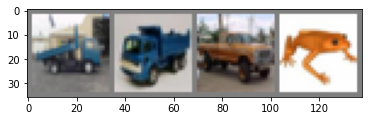

truck truck truck  frog


In [9]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [10]:
images[0].shape

torch.Size([3, 32, 32])

In [11]:
list(dataiter)

[[tensor([[[[ 0.0039, -0.0118, -0.0118,  ..., -0.0510, -0.0510, -0.0588],
            [ 0.0118, -0.0039, -0.0118,  ..., -0.0510, -0.0510, -0.0510],
            [-0.0039, -0.0196, -0.0196,  ..., -0.0667, -0.0667, -0.0667],
            ...,
            [-0.6706, -0.6941, -0.8667,  ..., -0.6706, -0.6157, -0.5843],
            [-0.6627, -0.7333, -0.8588,  ..., -0.6471, -0.5765, -0.5686],
            [-0.6863, -0.7255, -0.7725,  ..., -0.6471, -0.6078, -0.5608]],
  
           [[ 0.2784,  0.2549,  0.2549,  ...,  0.2235,  0.2235,  0.2235],
            [ 0.2941,  0.2706,  0.2627,  ...,  0.2314,  0.2314,  0.2314],
            [ 0.2706,  0.2549,  0.2549,  ...,  0.2157,  0.2157,  0.2157],
            ...,
            [-0.1529, -0.1922, -0.4275,  ..., -0.1529, -0.0980, -0.0667],
            [-0.1294, -0.2157, -0.4118,  ..., -0.1294, -0.0588, -0.0510],
            [-0.1608, -0.2235, -0.3490,  ..., -0.1373, -0.0902, -0.0431]],
  
           [[ 0.5922,  0.5686,  0.5686,  ...,  0.5059,  0.5059,  0.498

In [12]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [13]:
net = Net()

In [16]:
#classification = cross entropy
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [17]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[W ParallelNative.cpp:206] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:206] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


[1,  2000] loss: 2.178
[1,  4000] loss: 1.910
[1,  6000] loss: 1.701
[1,  8000] loss: 1.582
[1, 10000] loss: 1.530
[1, 12000] loss: 1.496


[W ParallelNative.cpp:206] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:206] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


[2,  2000] loss: 1.413
[2,  4000] loss: 1.409
[2,  6000] loss: 1.369
[2,  8000] loss: 1.373
[2, 10000] loss: 1.341
[2, 12000] loss: 1.331
Finished Training


In [19]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

[W ParallelNative.cpp:206] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:206] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


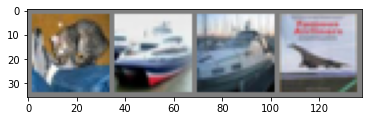

GroundTruth:    cat  ship  ship plane


In [18]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [20]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [21]:
outputs = net(images)

In [22]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat   car  ship  ship


In [1]:
classes[predicted]

NameError: name 'classes' is not defined

In [23]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

[W ParallelNative.cpp:206] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:206] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


Accuracy of the network on the 10000 test images: 53 %


In [24]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

[W ParallelNative.cpp:206] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:206] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


Accuracy for class plane is: 69.1 %
Accuracy for class car   is: 71.8 %
Accuracy for class bird  is: 16.6 %
Accuracy for class cat   is: 23.1 %
Accuracy for class deer  is: 51.0 %
Accuracy for class dog   is: 54.8 %
Accuracy for class frog  is: 71.4 %
Accuracy for class horse is: 60.1 %
Accuracy for class ship  is: 56.6 %
Accuracy for class truck is: 58.4 %
